# Assessment 2 - Classification
Author: **612089**<br>
Student number: **612089**<br>
Date: **10-07-2020**

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* sklearn
* ID3
* XGBoost

From these we will need the following libraries:

In [1]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sklean imports
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

# other imports
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
from id3 import Id3Estimator
from xgboost import XGBClassifier

# 1. The Data
We are going to use the datafile **mushrooms.csv**.<br>
<br>
Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

In [2]:
# we are going to load in the CSV file to work with
mushroom_data = pd.read_csv(
     'mushrooms.csv')

In [3]:
# enter the code to see the first few rows of the data
mushroom_data.head(5)

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

The different variables that are used are almost all columns. We are going to predict if mushrooms are adible or poisonous. This will be predicted by all the other 22 columns. <br>
All the columns refer to the appearence of the mushrooms. For example the color of the cap, the shape of the cap and many more details.
Before this can be done, we have to convert all the `string` values to ints in order to work with. We do this by converting it using Pandas.

In [4]:
# convert the columns to Pandas using Categorical
mushroom_data["class"] = pd.Categorical(mushroom_data["class"])
mushroom_data["cap-shape"] = pd.Categorical(mushroom_data["cap-shape"])
mushroom_data["cap-surface"] = pd.Categorical(mushroom_data["cap-surface"])
mushroom_data["cap-color"] = pd.Categorical(mushroom_data["cap-color"])
mushroom_data["bruises"] = pd.Categorical(mushroom_data["bruises"])
mushroom_data['odor'] = pd.Categorical(mushroom_data['odor'])
mushroom_data["gill-attachment"] = pd.Categorical(mushroom_data["gill-attachment"])
mushroom_data["gill-spacing"] = pd.Categorical(mushroom_data["gill-spacing"])
mushroom_data["gill-size"] = pd.Categorical(mushroom_data["gill-size"])
mushroom_data["gill-color"] = pd.Categorical(mushroom_data["gill-color"])
mushroom_data["stalk-shape"] = pd.Categorical(mushroom_data["stalk-shape"])
mushroom_data["stalk-root"] = pd.Categorical(mushroom_data["stalk-root"])
mushroom_data["stalk-surface-above-ring"] = pd.Categorical(mushroom_data["stalk-surface-above-ring"])
mushroom_data["stalk-color-above-ring"] = pd.Categorical(mushroom_data["stalk-color-above-ring"])
mushroom_data["stalk-color-below-ring"] = pd.Categorical(mushroom_data["stalk-color-below-ring"])
mushroom_data["veil-type"] = pd.Categorical(mushroom_data["veil-type"])
mushroom_data["veil-color"] = pd.Categorical(mushroom_data["veil-color"])
mushroom_data["ring-number"] = pd.Categorical(mushroom_data["ring-number"])
mushroom_data["ring-type"] = pd.Categorical(mushroom_data["ring-type"])
mushroom_data["spore-print-color"] = pd.Categorical(mushroom_data["spore-print-color"])
mushroom_data["population"] = pd.Categorical(mushroom_data["population"])
mushroom_data["habitat"] = pd.Categorical(mushroom_data["habitat"])

mushroom_data["class"] = mushroom_data["class"].cat.codes
mushroom_data["cap-shape"] = mushroom_data["cap-shape"].cat.codes
mushroom_data["cap-surface"] = mushroom_data["cap-surface"].cat.codes
mushroom_data["cap-color"] = mushroom_data["cap-color"].cat.codes
mushroom_data["bruises"] = mushroom_data["bruises"].cat.codes
mushroom_data['odor'] = mushroom_data['odor'].cat.codes
mushroom_data["gill-attachment"] = mushroom_data["gill-attachment"].cat.codes
mushroom_data["gill-spacing"] = mushroom_data["gill-spacing"].cat.codes
mushroom_data["gill-size"] = mushroom_data["gill-size"].cat.codes
mushroom_data["gill-color"] = mushroom_data["gill-color"].cat.codes
mushroom_data["stalk-shape"] = mushroom_data["stalk-shape"].cat.codes
mushroom_data["stalk-root"] = mushroom_data["stalk-root"].cat.codes
mushroom_data["stalk-surface-above-ring"] = mushroom_data["stalk-surface-above-ring"].cat.codes
mushroom_data["stalk-color-above-ring"] = mushroom_data["stalk-color-above-ring"].cat.codes
mushroom_data["stalk-color-below-ring"] = mushroom_data["stalk-color-below-ring"].cat.codes
mushroom_data["veil-type"] = mushroom_data["veil-type"].cat.codes
mushroom_data["veil-color"] = mushroom_data["veil-color"].cat.codes
mushroom_data["ring-number"] = mushroom_data["ring-number"].cat.codes
mushroom_data["ring-type"] = mushroom_data["ring-type"].cat.codes
mushroom_data["spore-print-color"] = mushroom_data["spore-print-color"].cat.codes
mushroom_data["population"] = mushroom_data["population"].cat.codes
mushroom_data["habitat"] = mushroom_data["habitat"].cat.codes

# declaring the X variable by selecting 22 columns
X = mushroom_data[["cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat"]]

# declaring the Y variable by selecting the class we are going to predict
Y = mushroom_data["class"]

The following code will create the X- and Y-train and the X- and Y-test variables. This is done using a standard function `train_test_split`. <br>
The test size that is used is 0.2.

In [5]:
# code to split data in training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=735)


In [6]:
# print predicted test size and actual test size
print("Original size: ", X.shape[0])
print("Predicted test set size (40%): ", 0.2*X.shape[0])
print("Actual test set size", X_test.shape[0])

Original size:  8124
Predicted test set size (40%):  1624.8000000000002
Actual test set size 1625


This print statement is used for showing if the test and training set size is correct. Otherwise the wrong predictions will be made. <br>
The next step is about the basic classification models.

# 2. The Basic Classification Models

In the Jupyter Notebook from lecture 5 a few different Clustering techniques were discussed. Lets explore how these perform on the data. <br>
<br>
Before we look at some 'real' models, its a good idea to get a baseline in by using one or more of the dummy classifiers. Lets see how they perform:

In [7]:
# code to create, fit and measure the dummy classifiers (see chapter 5.4. in the lecture notebook)
# include both the accuracy score and the confusion matrix for each.
scaler = StandardScaler()
scaler.fit(X_train)

# decalre trainscaled variables for dummy
X_trainScaled = scaler.transform(X_train)
X_testScaled = scaler.transform(X_test)

# print most_frequent dummy results
print('Dummy classifier most frequent:')
dumMF = DummyClassifier(strategy='most_frequent')
dumMF = dumMF.fit(X_trainScaled, Y_train)
Y_pred = dumMF.predict(X_testScaled)

print('Accuracy:',metrics.accuracy_score(Y_test, Y_pred))
print('Confusion matrix: \n',confusion_matrix(Y_test, Y_pred))

print()

# print stratified dummy results
print('Dummy classifier Stratified:')
# Dummy classifier with stratified method
dumSrat = DummyClassifier(strategy="stratified")
dumSrat = dumSrat.fit(X_trainScaled, Y_train)
Y_pred = dumSrat.predict(X_testScaled)
print('Accuracy:',metrics.accuracy_score(Y_test, Y_pred))
print('Confusion matrix: \n',confusion_matrix(Y_test, Y_pred))

print()

# print prior dummy results
print('Dummy classifier Prior:')
dumPrior = DummyClassifier(strategy="prior")
dumPrior.fit(X_trainScaled, Y_train)
Y_pred = dumPrior.predict(X_testScaled)
print('Accuracy:',metrics.accuracy_score(Y_test, Y_pred))
print('Confusion matrix: \n',confusion_matrix(Y_test, Y_pred))

print()

# print uniform dummy results
print('Dummy classifier Uniform:')
dumUni = DummyClassifier(strategy="uniform")
dumUni.fit(X_trainScaled, Y_train)
Y_pred = dumUni.predict(X_testScaled)
print('Accuracy:',metrics.accuracy_score(Y_test, Y_pred))
print('Confusion matrix: \n',confusion_matrix(Y_test, Y_pred))

Dummy classifier most frequent:
Accuracy: 0.5126153846153846
Confusion matrix: 
 [[833   0]
 [792   0]]

Dummy classifier Stratified:
Accuracy: 0.488
Confusion matrix: 
 [[421 412]
 [420 372]]

Dummy classifier Prior:
Accuracy: 0.5126153846153846
Confusion matrix: 
 [[833   0]
 [792   0]]

Dummy classifier Uniform:
Accuracy: 0.5070769230769231
Confusion matrix: 
 [[421 412]
 [389 403]]


**Most frequent** <br>
The most frequent classifier shows us that the predicted yes is actually 0 and the actual is no. <br>
So that's a good sign. The predicted no and the actual no is very high with this one. <br>
Another good thing. But the predicted yes and the actual yes is 0. This means that the dummy classifier never predicted yes! <br>
The dummy classifier only selected `no` and therefor achieved a accuracy of around *50%* <br>
The reason is because of the most frequent predicted using the most frequent label.

<br>

**Stratified** <br>
The stratified classifier uses the training set class distribution. if the dataset is unbalanced or the number of classes is greater than , this will split the dataset well. <br>
ut if your data distribution is unbalanced and one of the classes is in minority, you do stratified sampling so as to ensure that your train and test splits represent the true nature of your data. <br>
In our case, the training set class only consists of 2 classes, edible and poisnonous. So this will perform in a *50%* with around as many guesses in in every cell in the matrix. <br>

<br>

**Prior** <br>
The Prior classifier is almost like the most frequent classifier. The class prior always predict the class that maximizes the class prior. <br>
In this case, using 2 classes, the outcome is around *50%*. Actually it is a little bit above, it is *51%*. <br>
This value is higher than the stratified classifier. The reason is <br>

<br>

**Uniform** <br>
The Uniform classifier predicts uniformly at random. This is a wild guess. So the outcome is exactly *50%*. The one class, or the other. <br>
In any other sitaution with more than 2 classes, this option would be very interesting. <br>

<br>

So, those are our 'baseline'. A model should be able to at least outperform these.

Lets dive in...

## 2.1. Naive Bayes

The first model discussed, in the lessons, was the Naive Bayes model. <br>
Lets create and fit this model:

In [8]:
gaussNB = GaussianNB()
gaussNB.fit(X_train, Y_train)                               

GaussianNB()

Now to measure it's performance

In [9]:
Y_pred = gaussNB.predict(X_test)

# print NB results
print('Accuracy:', metrics.accuracy_score(Y_test, Y_pred))
print('Confusion matrix: \n', confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9113846153846153
Confusion matrix: 
 [[759  74]
 [ 70 722]]


**What do the numbers mean? How is this compared to the dummy classifiers?** <br>
<br>
The previous results are very interesting. <br>
A accuracy of *91%* is achieved! <br>
The reason for this is that an acutal model is used instead of a classifier that is made for settting up a baseline by guessing.<br>
The confusion matrix shows that 759 classes are predicted with no and are actually no. Predicted yes and actual no are 74. That is around 90% predicted correctly. <br>
At the bottom row of the matrix, there are 70 class predicted as no and are actually yes. The next cell has a 722 predicted classes as yes and arer actually yes. <br>
Again this is around 90% predicted right. So a total accuracy of *91%* achieved using the Naive Bayes model. <br>

<br>


Lets also have a look at what a prediction would be. This model will predict a probability of each row in the form of an array. <br>
This means the first row has a probability of class 1, what means it is poisonois. The second row has a probiliby of class 0, which is adible. And so on.<br>

In [10]:
# code to show the prediction
gaussNB.predict(X_test)

array([1, 0, 1, ..., 0, 1, 1], dtype=int8)

That's about it for NB. A nice thing about NB is that it doesn't really require any parameters. Lets look at our next technique.

## 2.2. Support Vector Machines
The second model discussed were Support Vector Machines. There is a plural here, because we can use different kernels.<br>
Support Vector Machines is a classification algorithm. <br>
The advantages of using a Support Vector Machines, or SVM, are the folowing:
*  Effective in high dimensional spaces
*  Effective in cases where the number of dimensions is greater than samples
*  Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient
*  Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels
<br>
<br>

The basic kernel is the linear one, so we'll attempt that first:

In [11]:
# declarign the Support Vector Machines using a linear kernel
SVMLIN = SVC(kernel='linear')

# fitting the X-train and Y_train on the linear kernel
SVMLIN.fit(X_train, Y_train)

# calculating Y_pred using the model
Y_pred = SVMLIN.predict(X_test)

# printing the accuracy and the confusion matrix
print('The accuracy:',metrics.accuracy_score(Y_test, Y_pred))
print('The confusion matrix: \n',confusion_matrix(Y_test, Y_pred))

The accuracy: 0.9593846153846154
The confusion matrix: 
 [[807  26]
 [ 40 752]]


**What do the numbers mean? How is this compared to the dummy classifiers, and the NB?** <br>
<br>
The results from the previous model, using SVC, is increasingly higher. <br>
An accuracy of *95%* is achieved. offcourse this is a lot more than the dummy classifiers. Those dummy classifiers are focussed in randomly picking values based on the classes. <br>
This prediction is 4% higher than using the NB model. <br>


In [12]:
# code to create the models, fit the data, and show its accuracy score AND confusion matrix.
# make sure to print some text between to indicate which result belongs to which model.
print('RBF kernel')
SVMRBF = SVC(kernel='rbf')
SVMRBF.fit(X_train, Y_train)
Y_pred = SVMRBF.predict(X_test)
print('Accuracy:',metrics.accuracy_score(Y_test, Y_pred))
print('Confusion matrix: \n',confusion_matrix(Y_test, Y_pred))

print()

# print poly results
print('Poly kernel')
SVMPOLY = SVC(kernel='poly')
SVMPOLY.fit(X_train, Y_train)
Y_pred = SVMPOLY.predict(X_test)
print('Accuracy:',metrics.accuracy_score(Y_test, Y_pred))
print('Confusion matrix: \n',confusion_matrix(Y_test, Y_pred))

print()

# print sigmoid results
print('Sigmoid kernel')
SVMSIGM = SVC(kernel='sigmoid')
SVMSIGM.fit(X_train, Y_train)
Y_pred = SVMSIGM.predict(X_test)
print('Accuracy:',metrics.accuracy_score(Y_test, Y_pred))
print('Confusion matrix: \n',confusion_matrix(Y_test, Y_pred))

RBF kernel
Accuracy: 0.9883076923076923
Confusion matrix: 
 [[832   1]
 [ 18 774]]

Poly kernel
Accuracy: 0.9969230769230769
Confusion matrix: 
 [[833   0]
 [  5 787]]

Sigmoid kernel
Accuracy: 0.4793846153846154
Confusion matrix: 
 [[415 418]
 [428 364]]


**RBF kernel** <br>
The RBF Kernel achieved a accuracy of 98.8% and that ius a lot higher than the NB and the Dummy Classifiers. Because the Dummy Classifiers are using randomly data from the classes. <br>
<br>
**Poly kernel**<br>
The Poly Kernel achieved a accuracy of 99.6% and that is a lot higher than the NB and the Dummy Classifiers.<br>
The polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of these.<br>
<br>
**Sigmoid kernel**<br>
The Sigmoid kernel achieves an accuracy of 47%. That is a lot lower than previous tested models.<br>
The Sigmoid Kernel comes from the Neural Networks field, where the bipolar sigmoid function is often used as an activation function for artificial neurons.<br>
<br>
Allright, lets move on to the third technique...

## 2.3. K-Nearest Neighbors
The third technique is the K-Nearest Neighbors (KNN). <br>
he K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. <br>
KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks.

To use this we need to do some additional steps.

First we need to normalize our x variables:

In [13]:
# use the StandardScaler to normalize the two x variables
scaler = StandardScaler()
scaler.fit(X_train)

# Convert the train and test X values, using the same scaler (so based on the X_train)
X_trainScaled = scaler.transform(X_train)
X_testScaled = scaler.transform(X_test)

#
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_trainScaled, Y_train)
Y_pred = knn.predict(X_testScaled)
print('Accuracy :', metrics.accuracy_score(Y_test, Y_pred))
print('Confusion matrix: \n', confusion_matrix(Y_test, Y_pred))

Accuracy : 0.9993846153846154
Confusion matrix: 
 [[833   0]
 [  1 791]]


The above result is 99.9%. That is the highest accuracy score we achieved. Maybe 100% can be achieved if we now the right amount of neighbors. <br>
<br>
Second we need to determine how many neighbors (k) we want. To do this we'll visualize the results using different values for k.

Text(0, 0.5, 'Error Rate')

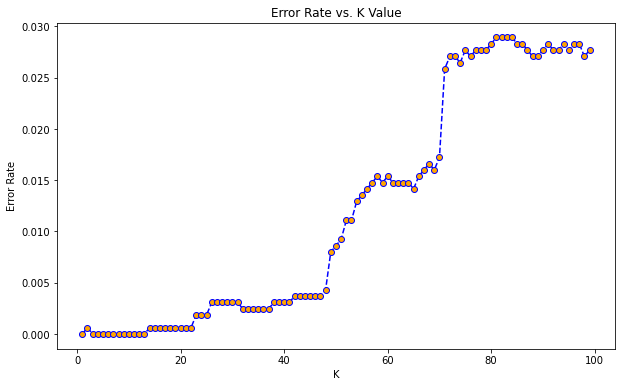

In [14]:
# Code to create the graph with Error Rate vs. K-values.
error_rate=[]
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainScaled, Y_train)
    pred_i = knn.predict(X_testScaled)
    error_rate.append(np.mean(pred_i != Y_test))

# printing plot
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=6)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

This graph is very simple to understand. The values of the mushrooms are so close to each other, that when more neighbors are selected, <br>
the chance for failure higher is. <br>
So when the K-value is higher, the error rate increases. <br>
Now that we see that the best K-value is 1, because of the lowest error rate, we can create the model using that value.

In [15]:
# create model using specified k-value
knn = KNeighborsClassifier(n_neighbors=1)

# fitting the knn with the variables
knn.fit(X_trainScaled, Y_train)

# predicting
Y_pred = knn.predict(X_testScaled)

# printing results
print('Accuracy score:', metrics.accuracy_score(Y_test, Y_pred))
print('Confusion matrix: \n', confusion_matrix(Y_test, Y_pred))

Accuracy score: 1.0
Confusion matrix: 
 [[833   0]
 [  0 792]]


The score above has achieved an 100% accuracy rate. That is very high! <br>
Compared to the Dummy Classifiers, this score is almost double so high. <br>
That is because the Dummy Classifiers are using randomize algoritms and are not using any model. Only looking at the data. <br>
Compared to the NB and the SVC this model achieved a higher accuracy. As seen, no errors are made in the confusion matrix.<br>
<br>
One more basic technique to go.

## 2.4. Decision Trees
The last technique that was discussed in detail, were the Decision Trees. <br>
<br>

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.<br>
* Simple to understand and to interpret. 
* Trees can be visualised.
* Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. <br>Note however that this module does not support missing values.<br>
<br>

The following variations were discussed:

* Entropy with sklearn
* Gini
* Random Forest
* Extra trees

Hopefully we have the hang of this now, so lets do each of them in one go:

In [16]:
# DecisionTreeClassifier package with entropy criterion
entropy = DecisionTreeClassifier(criterion = "entropy")
entropy.fit(X_trainScaled,Y_train)
Y_pred = entropy.predict(X_testScaled)

# printing results
print(metrics.accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

1.0
[[833   0]
 [  0 792]]


In [17]:
# DecisionTreeClassifier package with gini criterion
gini = DecisionTreeClassifier(criterion = "gini")
gini.fit(X_trainScaled,Y_train)
Y_pred = gini.predict(X_testScaled)

# printing results
print(metrics.accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

1.0
[[833   0]
 [  0 792]]


In [18]:
# RandomForestClassifier package
RandomForest = RandomForestClassifier(random_state=0)
RandomForestModel = RandomForest.fit(X_trainScaled, Y_train)
Y_pred = RandomForestModel.predict(X_testScaled)

# printing results
print(metrics.accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

1.0
[[833   0]
 [  0 792]]


In [19]:
# Extremly Random Forest (a.k.a. Extra trees) package
ExtremeRandomForest = ExtraTreesClassifier(random_state=1)
ExtremeRandomForestModel = ExtremeRandomForest.fit(X_trainScaled, Y_train)
Y_pred = ExtremeRandomForestModel.predict(X_testScaled)

# printing results
print(metrics.accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

1.0
[[833   0]
 [  0 792]]


The first Decision tree we used is the Entropy from sklearn. We achieved a 100% accuracy rate. This can't be any higher. The reason is we used a simple mushroom dataset specially for classification. <br>
All the other decision tree methods also achieved a 100% score. But before we move on, all the decision models will be explained. So we can see the difference from each other. <br>
Compared to the Dummy Classifiers, the NB model and the SVC models, these decision trees perform very well. This is explained because with most tree structures there are only 2 ways to go. <br>
In this scenario we used a mushroom dataset which contains 2 classes. Edible and poisonous. So this isn't that hard. This can be interesting when using more classes.<br>
<br>
**Entropy**<br>
A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values.<br>
<br>
**Gini**<br>
The Gini decisiton tree says, if we select two items from a population at random then they must be of same class and probability. Than the value will be 1. <br>
Gini works well with classes like 'succes' and 'failure', so only 2 classes. <br>
This can be very interesting in this dataset. In our case the accuracy is already very high, in other two-class datasets this can be more interesting.<br>
<br>
**Random Forest**<br>
The random forest is a model made up of many decision trees. Rather than just simply averaging the prediction of trees.<br>
This can be very intersting when the dataset contains of multiple classes.<br>
<br>
**Extreme Random Forest**<br>
This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees/extreme random forest) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.<br>
<br>
One last set of techniques to explore.

## 2.5. Other Models
In the Jupyter Notebook from the lecture, in chapter 5.4 a few more techniques were simply shown:

* Linear Discriminant Analysis
* Quadratic Discriminant Analysis
* Logistic Regression Classifier
* Multinomial Logistic Regression Classification
* Adaptive Boosting
* Gradient Boosting
* Histogram Gradient Boosting
* XGBoost
* Stacking

Out of curiousity lets see how these perform.

In [27]:
# code to create the models, fit the data, and show its accuracy score (the confusion matrix is here optional).
# make sure to print some text between to indicate which result belongs to which model.

# print linear discriminant analysis
print("\nLinear Discriminant Analysis")
LinearDiscriminant = LinearDiscriminantAnalysis()
LinearDiscriminantModel=LinearDiscriminant.fit(X_trainScaled, Y_train)
Y_pred = LinearDiscriminantModel.predict(X_testScaled)
print("Accuracy score: ",metrics.accuracy_score(Y_test, Y_pred))
print("Confusion matrix: \n",confusion_matrix(Y_test, Y_pred))

# print quadratic discriminant analysis
print("\nQuadratic Discriminant Analysis")
QuadraticDiscriminant = QuadraticDiscriminantAnalysis()
QuadraticDiscriminantModel=QuadraticDiscriminant.fit(X_trainScaled, Y_train)
Y_pred= QuadraticDiscriminantModel.predict(X_testScaled)

# print logistic regression classification
print("\nLogistic Regression Classification")
LogisticRegress = LogisticRegression()
LogisticRegressionModel = LogisticRegress.fit(X_trainScaled, Y_train)
Y_pred = LogisticRegressionModel.predict(X_testScaled)
print("Accuracy score: ",metrics.accuracy_score(Y_test, Y_pred))
print("Confusion matrix: \n",confusion_matrix(Y_test, Y_pred))

# print multinomial logistic regression classification
print("\nMultinomial Logistic Regression Classification")
LogisticRegressionML = LogisticRegression(multi_class='multinomial')
LogisticRegressionMLModel = LogisticRegressionML.fit(X_trainScaled, Y_train)
Y_pred = LogisticRegressionMLModel.predict(X_testScaled)
print("Accuracy score: ",metrics.accuracy_score(Y_test, Y_pred))
print("Confusion matrix: \n",confusion_matrix(Y_test, Y_pred))

# print AdaBoost
print("\nAdaBoost")
adaBoost = AdaBoostClassifier(random_state=0)
adaBoostModel = adaBoost.fit(X_trainScaled, Y_train)
Y_pred = adaBoostModel.predict(X_testScaled)
print("Accuracy score: ",metrics.accuracy_score(Y_test, Y_pred))
print("Confusion matrix: \n",confusion_matrix(Y_test, Y_pred))

# print Gradient Boosting
print("\nGradient Boosting")
gradientBoost = GradientBoostingClassifier(random_state=0)
gradientBoostModel = gradientBoost.fit(X_trainScaled, Y_train)
Y_pred = gradientBoostModel.predict(X_testScaled)
print("Accuracy score: ",metrics.accuracy_score(Y_test, Y_pred))
print("Confusion matrix: \n",confusion_matrix(Y_test, Y_pred))

# print XGBoost
print("\nXGBoost")
XGboost = HistGradientBoostingClassifier(random_state=0)
XGboostModel = XGboost.fit(X_trainScaled, Y_train)
Y_pred = XGboostModel.predict(X_testScaled)
print("Accuracy score: ",metrics.accuracy_score(Y_test, Y_pred))
print("Confusion matrix: \n",confusion_matrix(Y_test, Y_pred))

# print Stacking
print("\nStacking")


estimators = [
    ('rf', RandomForestClassifier(n_estimators=1, random_state=80)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=80)))]

stackCl = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression())
stackCl.fit(X_trainScaled,Y_train)
Y_pred = stackCl.predict(X_testScaled)
print("Accuracy score: ",metrics.accuracy_score(Y_test, Y_pred))
print("Confusion matrix: \n",confusion_matrix(Y_test, Y_pred))


Linear Discriminant Analysis
Accuracy score:  0.9335384615384615
Confusion matrix: 
 [[790  43]
 [ 65 727]]

Quadratic Discriminant Analysis

Logistic Regression Classification
Accuracy score:  0.952
Confusion matrix: 
 [[795  38]
 [ 40 752]]

Multinomial Logistic Regression Classification
Accuracy score:  0.96
Confusion matrix: 
 [[800  33]
 [ 32 760]]

AdaBoost
Accuracy score: 1.0
Confusion matrix: 
 [[833   0]
 [  0 792]]

Gradient Boosting
Accuracy score:  1.0
Confusion matrix: 
 [[833   0]
 [  0 792]]

XGBoost
Accuracy score:  1.0
Confusion matrix: 
 [[833   0]
 [  0 792]]

Stacking
Accuracy score:  0.9993846153846154
Confusion matrix: 
 [[832   1]
 [  0 792]]


The AdaBoost, Gradient Boosting and the XGBoost scored best. Those techniques achieved an 100% accuracy rate. <br>
After that, the Stacking technique achieved a 99.9% accuracy rate.<br>
The Mutlinomial Logistic Regression Classification scored an 96% accuracy rate. <br>

<font size="5"><center>-----Chapters 1 and 2 are required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 3. Visualisation

With two input parameters we can actually determine visually where a model will classify a variable into which category. An overview of such plots is shown at https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

We cannot copy that code since it does a comparison. What we want is a function that takes the X and Y data as input, as well as the model to be used and then shows the decision areas.

In [21]:
# the code for the function


In [22]:
# an example of using the function


# 4. Categorical Input
With classification we have a categorical output variable, but what if we also have one or more categorical input variables.

One popular technique is one-hot-encoding, but there are others.

In this chapter we'll discuss \<your chosen technique>.

**\<explain the technique in detail. What does it do and how does it work>**

In [23]:
# example code of using this technique


# 5. Performance
Some models get higher accuracy scores than others. In the Jupyter Notebook from the lecture the UFC data was used and the QDA had the highest accuracy score: 0.6747. The big question is, can it be done better? First areas to look for improvement are to simply increase the number of input variables, or tweak some parameters of some of the models, or a combination of both.

In this chapter we'll give it an attempt.

First we need to load the data:

In [24]:
# code to load the UFC data


**\<explain your attempt, what did you do.>**

In [25]:
# code that will generate an accuracy score for the outcome that is higher than 0.6747


# 6. A New Technique

Many techniques were discussed in class and the lecture Jupyter Notebook, but there are a lot more. In this chapter the \<your chosen new technique> is discussed.

**\<explain in detail this new technique. Note that other students should be able to understand it from your explanation alone!>**

In [26]:
# code on using this technique


**\<feel free to use more cells for this, you probably need them>**